# Цель лабораторной работы
Изучить способы предварительной обработки данных для&nbsp;дальнейшего формирования моделей<cite data-cite="ue:lab3"></cite>.

# Задание
Требуется<cite data-cite="ue:lab3"></cite>:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в&nbsp;данных. Для&nbsp;выполнения следующих пунктов можно использовать несколько различных наборов данных.
2. Для&nbsp;выбранного датасета (датасетов) на основе материалов [лекции](https://github.com/ugapanyuk/ml_course/blob/master/common/notebooks/missing/handling_missing_norm.ipynb) решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.

# Ход выполнения работы

Подключим все необходимые библиотеки и настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing
import matplotlib.pyplot as plt
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

In [40]:
 from sklearn.preprocessing import Normalizer

In [2]:
pd.set_option("display.width", 70)

In [5]:
data = pd.read_csv("/Users/elizavetasukach/Desktop/MachineLearning/PatientInfo.csv")

In [9]:
data.dtypes

patient_id              int64
global_num            float64
sex                    object
birth_year            float64
age                    object
country                object
province               object
city                   object
disease                object
infection_case         object
infection_order       float64
infected_by           float64
contact_number        float64
symptom_onset_date     object
confirmed_date         object
released_date          object
deceased_date          object
state                  object
dtype: object

In [10]:
data.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
data.isnull().sum()

patient_id               0
global_num            1160
sex                     94
birth_year             464
age                    105
country                 90
province                 0
city                    76
disease               3110
infection_case         819
infection_order       3097
infected_by           2393
contact_number        2539
symptom_onset_date    2682
confirmed_date           0
released_date         2147
deceased_date         3072
state                    0
dtype: int64

In [28]:
total_count = data.shape[0]

In [25]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((3128, 18), (3128, 5))

In [26]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((3128, 18), (0, 18))

In [29]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка birth_year. Тип данных float64. Количество пустых значений 464, 14.83%.
Колонка infection_order. Тип данных float64. Количество пустых значений 3097, 99.01%.
Колонка infected_by. Тип данных float64. Количество пустых значений 2393, 76.5%.
Колонка contact_number. Тип данных float64. Количество пустых значений 2539, 81.17%.


In [30]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,birth_year,infection_order,infected_by,contact_number
0,1964.0,1.0,NaN,75.0
1,1987.0,1.0,NaN,31.0
2,1964.0,2.0,2.002000e+09,17.0
3,1991.0,1.0,NaN,9.0
4,1992.0,2.0,1.000000e+09,2.0
...,...,...,...,...
3123,NaN,NaN,NaN,20.0
3124,NaN,NaN,NaN,23.0
3125,1996.0,NaN,NaN,26.0
3126,NaN,NaN,NaN,25.0


Самый простой вариант — заполнить пропуски нулями:

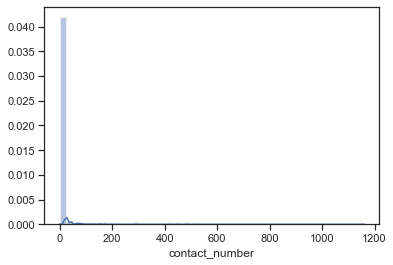

In [43]:
sns.distplot(data['contact_number'].fillna(0));

In [ ]:
Это приведет к выбросу, поэтому заполним средними значениями

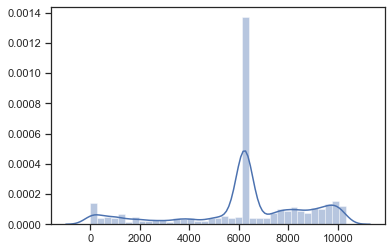

In [12]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_rat = mean_imp.fit_transform(data[["global_num"]])
sns.distplot(mean_rat);

Попробуем также медианный рейтинг и самый частый рейтинг:

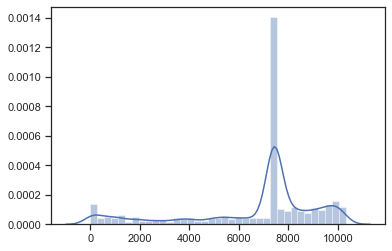

In [13]:
med_imp = sklearn.impute.SimpleImputer(strategy="median")
med_rat = med_imp.fit_transform(data[["global_num"]])
sns.distplot(med_rat);

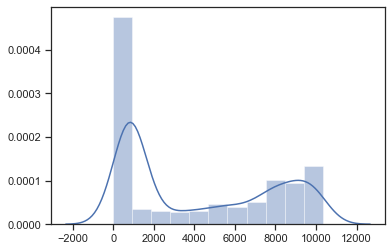

In [14]:
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rat = freq_imp.fit_transform(data[["global_num"]])
sns.distplot(freq_rat);

In [15]:
#самый близкий к нормальному распределению - средние значения
data["global_num"] = mean_rat

## Кодирование категориальных признаков


Рассмотрим колонку `sex`:

In [16]:
types = data["sex"].dropna().astype(str)
types.value_counts()

female    1707
male      1327
Name: sex, dtype: int64

Выполним кодирование категорий целочисленными значениями:


In [18]:
le = sklearn.preprocessing.LabelEncoder()
type_le = le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[0 1]


array(['female', 'male'], dtype=object)

Выполним кодирование категорий наборами бинарных значений:

In [21]:
type_oh = pd.get_dummies(types)
type_oh.head()

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [22]:
type_oh[type_oh["female"] == 1].head()

,female,male
4,1,0
5,1,0
9,1,0
10,1,0
13,1,0


## Масштабирование данных

In [ ]:
Для начала попробуем обычное MinMax-масштабирование:

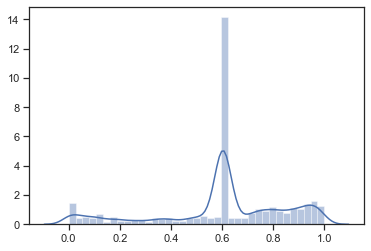

In [23]:
mm = sklearn.preprocessing.MinMaxScaler()
sns.distplot(mm.fit_transform(data[["global_num"]]));

 попробуем и другие варианты, например, масштабирование на основе Z-оценки:

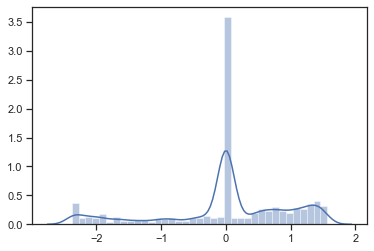

In [24]:
ss = sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["global_num"]]));

## Нормализация

In [41]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['global_num']])

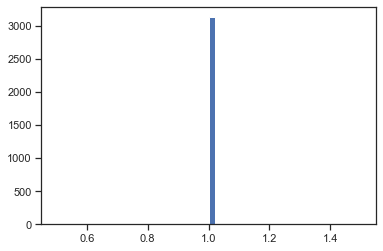

In [42]:

plt.hist(sc3_data, 50)
plt.show()